# Analyse Results for Transfer Learning tests
- European data
- Each model trained on 200 samples
- Ensemble size is 20
- 20 Ensembles
- Compare full transfer and frozen layers with no transfer learning

## Imports

In [1]:
import glob
import json
import os
import pandas as pd
import random

from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

import initialise
import common
#from results_utils import generate_ensembles
from analysis_utils import calc_statistics, sort_file_list
from display_utils import display_frames

In [2]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', title_fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
legend_title = 'Training Data Sample Set Size'

## Directories and other settings
- Update the model directories as required

In [4]:
results_dir = os.path.join(common.DATA_DIR, 'Results')
output_dir = common.FIGURES_DIR
precision = 3       # floating point precision for saved predictions

In [5]:
def get_test_results(size, test):
    results_temp = []
    stats_file = os.path.join(results_dir, f"Europe{size}", f"{test}_stats.csv")
    return pd.read_csv(stats_file, index_col=1)

In [6]:
sizes = ['200', '500', '1000', '2000', '4000', 'Full', 'None']
tests = ['Source-only',
         'AdaBN',
         'Target-only',
         'Sourcerer-reg',
         'Naive',
         'Freeze-1st',
         'Freeze-conv',
         'Freeze-BN',
         'Sourcerer']

results_dict = {s: {} for s in sizes}
for s in sizes:
    if s == 'None':
        results_dict[s]['Source-only'] = get_test_results('Full', 'Source-only')
    else:
        for e, t in enumerate(tests):
            if e > 0:
                t1 = 'Naive\nfine-tuning' if t == 'Naive' else t
                results_dict[s][t1] = get_test_results(s, t)

In [7]:
rmse_results = []
rmse_keys = []
for s in sizes:
    if len(results_dict[s]) > 0:
        rmse_results.append(pd.concat([results_dict[s][t]['RMSE'] for t in results_dict[s].keys()],
                                      axis=1, keys=results_dict[s].keys(), names=['Test Name']).T)
        rmse_keys.append(s)
rmse_results = pd.concat(rmse_results, keys=rmse_keys, names=[legend_title]).stack().reset_index()
rmse_summ = rmse_results.groupby([legend_title, 'Test Name'])[0].mean().unstack(level=0)[rmse_keys]

In [8]:
r2_results = []
r2_keys = []
for s in sizes:
    if len(results_dict[s]) > 0:
        r2_results.append(pd.concat([results_dict[s][t]['R2'] for t in results_dict[s].keys()],
                                    axis=1, keys=results_dict[s].keys(), names=['Test Name']).T)
        r2_keys.append(s)
r2_results = pd.concat(r2_results, keys=r2_keys, names=[legend_title]).stack().reset_index()
r2_summ = r2_results.groupby([legend_title, 'Test Name'])[0].mean().unstack(level=0)[r2_keys]

In [9]:
rmse_summ = rmse_summ.sort_values('200', ascending=False)
r2_summ = r2_summ.sort_values('200')
display_frames([rmse_summ, r2_summ], ['$RMSE$', '$R^2$'], precision=3)

Training Data Sample Set Size,200,500,1000,2000,4000,Full,None
Test Name,,,,,,,
AdaBN,26.416,26.563,26.155,26.044,25.985,26.195,nan
Target-only,22.982,21.813,20.992,20.247,19.641,19.794,nan
Sourcerer-reg,21.908,21.364,20.506,19.544,18.974,18.718,nan
Naive fine-tuning,21.488,20.806,19.976,19.378,18.837,18.645,nan
Freeze-1st,21.341,20.743,20.134,19.613,19.287,19.163,nan
Freeze-conv,21.162,20.561,20.320,20.096,20.014,19.912,nan
Freeze-BN,21.008,20.407,20.245,19.795,19.547,19.501,nan
Sourcerer,20.532,20.407,20.342,19.893,19.602,19.530,nan
Source-only,nan,nan,nan,nan,nan,nan,24.206


## Figures

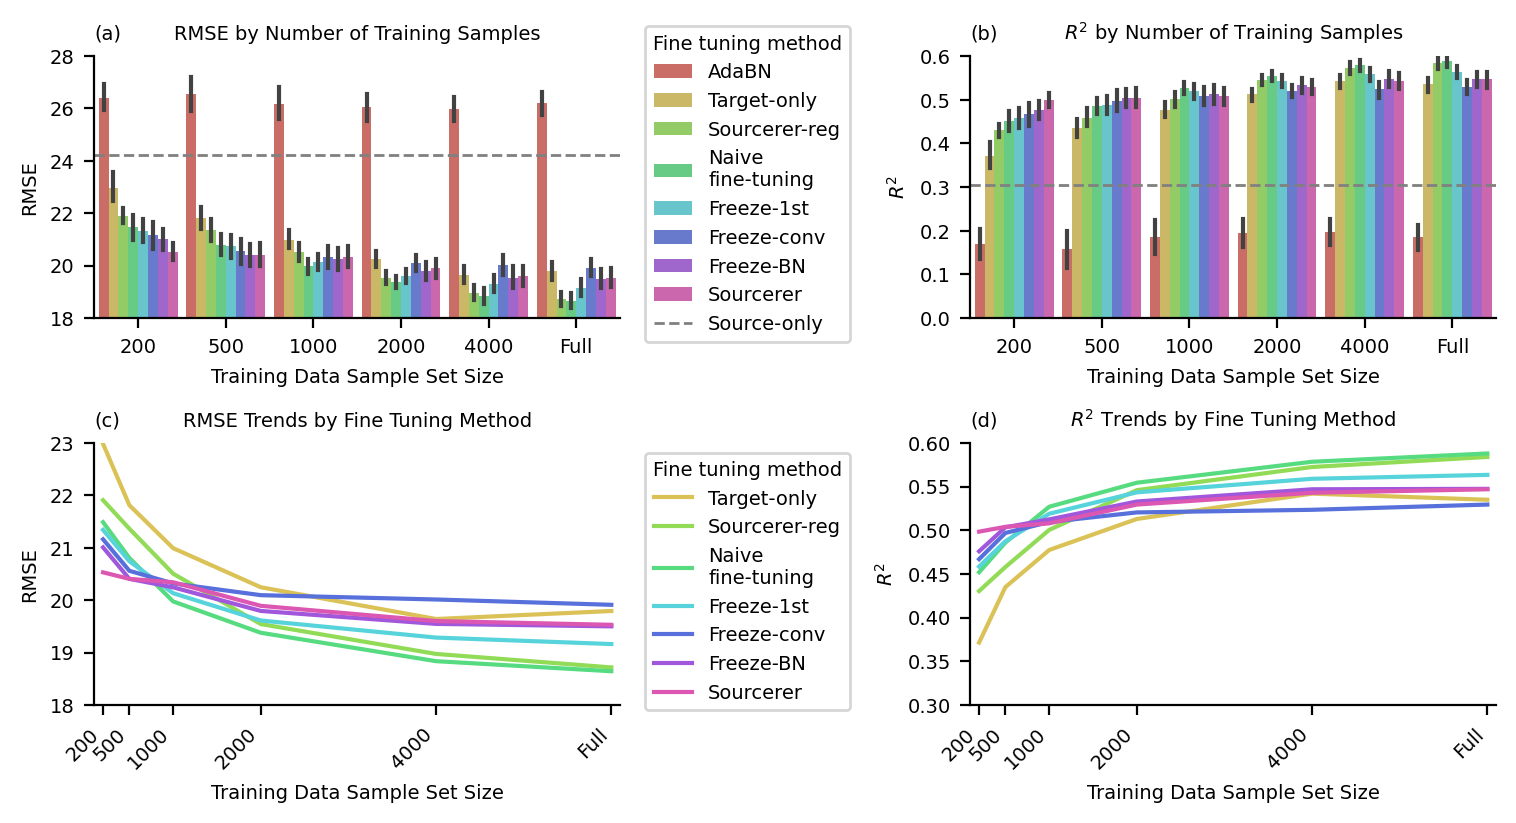

In [10]:
source_only_pos = 62
sns.set_palette("hls", 8)

fig1, axes = plt.subplots(nrows=2, ncols=3, figsize=(7.464, 4.0), dpi=200, layout='constrained',
                          width_ratios=[3, 1, 3], gridspec_kw={'wspace': 0.05, 'hspace': 0.05})

# Plot bar charts
axes = axes.flatten()
ax = axes[0]
ax = sns.barplot(data=rmse_results[rmse_results['Training Data Sample Set Size'] != 'None'], y=0,
                 hue='Test Name', x=legend_title, ax=ax, errwidth=1.5, width=0.9)
ax.set_ylabel('RMSE')
ax.set_ylim(18, 28)
ax.set_xlabel(rmse_summ.columns.name)
xlim = ax.get_xlim()
ax.plot(xlim, [rmse_summ['None']['Source-only']] * 2, color='grey', linestyle='--', linewidth=1)
ax.set_xlim(xlim)
ax.set_title('RMSE by Number of Training Samples')
ax.set_title('(a)', loc='left')
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)

handles, labels = ax.get_legend_handles_labels() #ax.legend()
ax.legend().remove()
handles.append(Line2D([], [], color='grey', linestyle='--', linewidth=1))
labels.append("Source-only")
axes[1].legend(handles, labels, title='Fine tuning method', loc="upper center", bbox_to_anchor=(0.5, 1.15))
axes[1].set_axis_off()
    
#source_only_pos = 20
ax = axes[2]
ax = sns.barplot(data=r2_results[r2_results['Training Data Sample Set Size'] != 'None'], y=0,
                 hue='Test Name', x=legend_title, ax=ax, errwidth=1.5, width=0.9)
ax.set_ylabel('$R^2$')
ax.set_ylim(0.0, 0.6)
ax.set_xlabel(rmse_summ.columns.name)
xlim = ax.get_xlim()
ax.plot(xlim, [r2_summ['None']['Source-only']] * 2, color='grey', linestyle='--', linewidth=1)
ax.set_xlim(xlim)
ax.set_title('$R^2$ by Number of Training Samples')
ax.set_title('(b)', loc='left')
ax.legend().remove()
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)

# Line charts
full = 6000
palette = sns.hls_palette(8)
cmap = ListedColormap(palette[1:8])
plot_order = rmse_summ.max(axis=1).sort_values(ascending=False).index.values

rmse_summ2 = rmse_summ.copy()
rmse_summ2.columns = [200, 500, 1000, 2000, 4000, full, 0]
ax = rmse_summ2.T.drop(labels=['Source-only', 'AdaBN'], axis=1).plot(kind='line', ax=axes[3], colormap=cmap)
ax.set_ylabel('RMSE')
ax.set_ylim(18, 23)
ax.set_xlabel(rmse_summ.columns.name)
ax.set_xticks([200, 500, 1000, 2000, 4000, full], labels=[200, 500, 1000, 2000, 4000, 'Full'], rotation=45, ha='right')
ax.set_xlim(100, full+100)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
ax.set_title('RMSE Trends by Fine Tuning Method')
ax.set_title('(c)', loc='left')
ax.legend().remove()

handles, labels = ax.get_legend_handles_labels() #ax.legend()
ax.legend().remove()
axes[4].legend(handles, labels, title='Fine tuning method', loc="upper center")
axes[4].set_axis_off()

r2_summ2 = r2_summ.copy()
r2_summ2.columns = [200, 500, 1000, 2000, 4000, full, 0]

ax = r2_summ2.T.drop(labels=['Source-only', 'AdaBN'], axis=1).plot(kind='line', ax=axes[5], colormap=cmap)
ax.set_ylabel('$R^2$')
ax.set_ylim(0.3, 0.6)
ax.set_xlabel(r2_summ.columns.name)
ax.set_xticks([200, 500, 1000, 2000, 4000, full], labels=[200, 500, 1000, 2000, 4000, 'Full'], rotation=45, ha='right')
ax.set_xlim(100, full+100)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
ax.set_title('$R^2$ Trends by Fine Tuning Method')
ax.set_title('(d)', loc='left')
ax.legend().remove()

fig1.savefig(os.path.join(output_dir, 'Europe results.jpeg'), format="jpeg", bbox_inches='tight', pad_inches=0.05, dpi=500)

#### Alternative barplot
This one may be worth using in place of the original one, if I include the line plot above

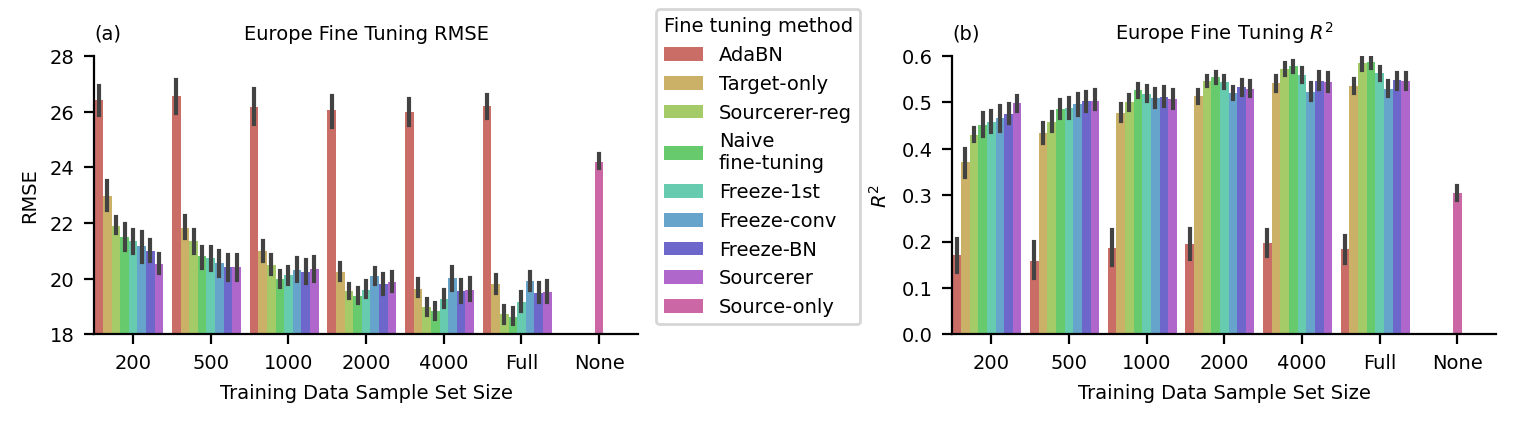

In [11]:
source_only_pos = 62
sns.set_palette("hls", 9)

fig1, axes = plt.subplots(nrows=1, ncols=3, figsize=(7.464, 2.0), dpi=200, layout='constrained',
                          width_ratios=[3, 1, 3], gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
#plot_order = rmse_summ.max(axis=1).sort_values(ascending=False).index.values

ax = axes[0]
ax = sns.barplot(data=rmse_results, y=0, hue='Test Name', x=legend_title, ax=ax, errwidth=1.5, width=1.0)
ax.set_ylabel('RMSE')
ax.set_ylim(18, 28)
ax.set_xlabel(rmse_summ.columns.name)
ax.set_title('Europe Fine Tuning RMSE')
ax.set_title('(a)', loc='left')
#ax.legend(title='Fine tuning method', loc='upper right')
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
bar_ = axes[0].findobj(Rectangle)[source_only_pos]
bar_.set_x(np.floor(bar_.get_x())-bar_.get_width()/2)
line_ = axes[0].findobj(Line2D)[source_only_pos]
xpos = line_.get_xdata((1, 1))
line_.set_xdata((np.floor(xpos[0]), np.floor(xpos[1])))

# leg = ax.legend()
axes[0].legend().remove()
# axes[1].legend(leg)
fig1.legend(title='Fine tuning method', loc="upper center")
axes[1].set_axis_off()
    
#source_only_pos = 20
ax = axes[2]
ax = sns.barplot(data=r2_results, y=0, hue='Test Name', x=legend_title, ax=ax, errwidth=1.5, width=1.0)
ax.set_ylabel('$R^2$')
ax.set_ylim(0.0, 0.6)
ax.set_xlabel(rmse_summ.columns.name)
ax.set_title('Europe Fine Tuning $R^2$')
ax.set_title('(b)', loc='left')
ax.legend().remove()
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
bar_ = ax.findobj(Rectangle)[source_only_pos]
bar_.set_x(np.floor(bar_.get_x())-bar_.get_width()/2)
line_ = ax.findobj(Line2D)[source_only_pos]
xpos = line_.get_xdata((1, 1))
line_.set_xdata((np.floor(xpos[1]), np.floor(xpos[1])))

#fig1.savefig(os.path.join(output_dir, 'Europe results.jpeg'), format="jpeg", bbox_inches='tight', pad_inches=0.05, dpi=500)

#### Line plot of results
Shows how the results for each method change with different training set sizes. May need results for 2000 and 4000
training samples if I use this plot.

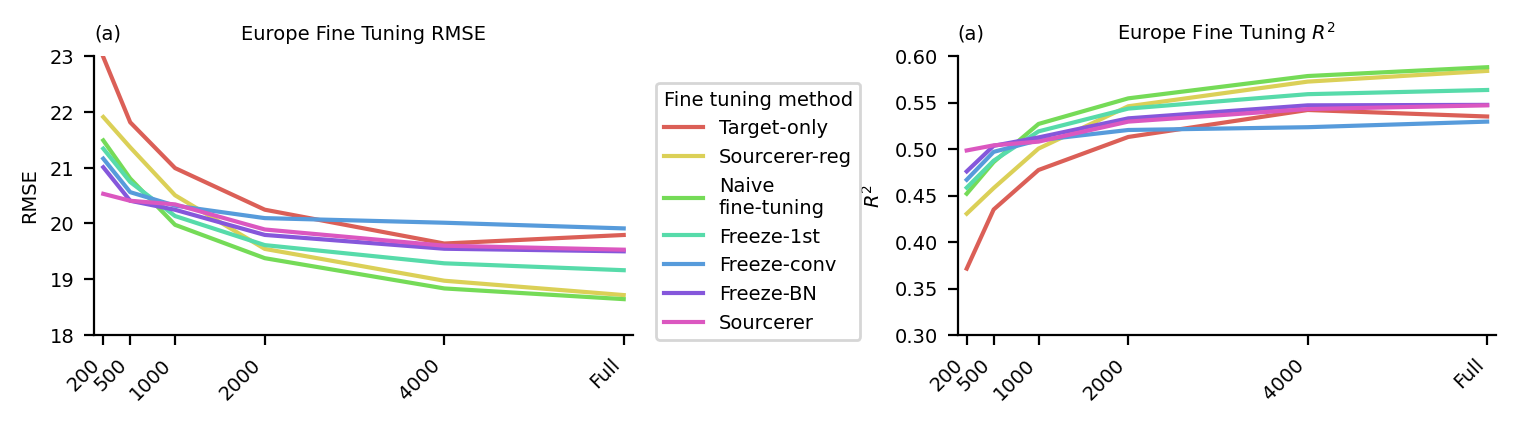

In [12]:
full = 6000
sns.set_palette("hls", 7)
fig1, axes = plt.subplots(nrows=1, ncols=3, figsize=(7.464, 2), dpi=200, layout='constrained',
                          width_ratios=[3, 1, 3], gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
plot_order = rmse_summ.max(axis=1).sort_values(ascending=False).index.values

rmse_summ2 = rmse_summ.copy()
rmse_summ2.columns = [200, 500, 1000, 2000, 4000, full, 0]
ax = rmse_summ2.T.drop(labels=['Source-only', 'AdaBN'], axis=1).plot(kind='line', ax=axes[0])
ax.set_ylabel('RMSE')
ax.set_ylim(18, 23)
#ax.set_xscale('log')
ax.set_xticks([200, 500, 1000, 2000, 4000, full], labels=[200, 500, 1000, 2000, 4000, 'Full'], rotation=45, ha='right')
ax.set_xlim(100, full+100)
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
ax.set_title('Europe Fine Tuning RMSE')
ax.set_title('(a)', loc='left')
ax.legend().remove()

fig1.legend(title='Fine tuning method', loc="center")
axes[1].set_axis_off()

r2_summ2 = r2_summ.copy()
r2_summ2.columns = [200, 500, 1000, 2000, 4000, full, 0]
ax = r2_summ2.T.drop(labels=['Source-only', 'AdaBN'], axis=1).plot(kind='line', ax=axes[2])
ax.set_ylabel('$R^2$')
ax.set_ylim(0.3, 0.6)
ax.set_xticks([200, 500, 1000, 2000, 4000, full], labels=[200, 500, 1000, 2000, 4000, 'Full'], rotation=45, ha='right')
ax.set_xlim(100, full+100)
#ax.set_xticklabels([200, 500, 1000, 2000, 4000, 'Full'])
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
ax.set_title('Europe Fine Tuning $R^2$')
ax.set_title('(a)', loc='left')
ax.legend().remove()



#### Original Barplot

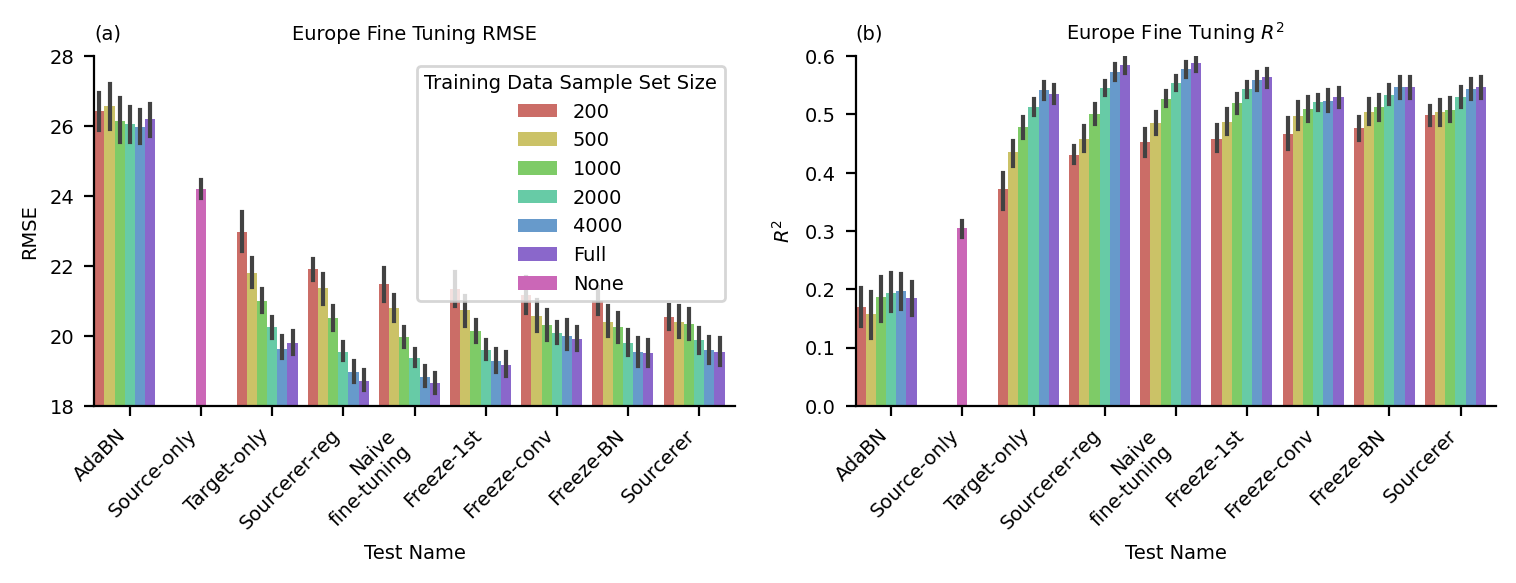

In [13]:
source_only_pos = 55
sns.set_palette("hls", 7)

fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(7.464, 2.8), dpi=200, layout='constrained',
                          gridspec_kw={'wspace': 0.05, 'hspace': 0.05})
plot_order = rmse_summ.max(axis=1).sort_values(ascending=False).index.values

ax = axes[0]
ax = sns.barplot(data=rmse_results, y=0, x='Test Name', hue=legend_title, ax=ax, order=plot_order, errwidth=1.5, width=1.0)
ax.set_ylabel('RMSE')
ax.set_ylim(18, 28)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Europe Fine Tuning RMSE')
ax.set_title('(a)', loc='left')
ax.legend(title=legend_title, loc='upper right')
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
bar_ = axes[0].findobj(Rectangle)[source_only_pos]
bar_.set_x(np.floor(bar_.get_x())-bar_.get_width()/2)
line_ = axes[0].findobj(Line2D)[source_only_pos]
xpos = line_.get_xdata((1, 1))
line_.set_xdata((np.floor(xpos[0]), np.floor(xpos[1])))
    
ax = axes[1]
ax = sns.barplot(data=r2_results, y=0, x='Test Name', hue=legend_title, ax=ax, order=plot_order, errwidth=1.5, width=1.0)
ax.set_ylabel('$R^2$')
ax.set_ylim(0.0, 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Europe Fine Tuning $R^2$')
ax.set_title('(b)', loc='left')
ax.legend().remove()
for axis in ['top', 'right']:
    ax.spines[axis].set_visible(False)
bar_ = axes[1].findobj(Rectangle)[source_only_pos]
bar_.set_x(np.floor(bar_.get_x())-bar_.get_width()/2)
line_ = axes[1].findobj(Line2D)[source_only_pos]
xpos = line_.get_xdata((1, 1))
line_.set_xdata((np.floor(xpos[1]), np.floor(xpos[1])))

#fig1.savefig(os.path.join(output_dir, 'Europe results.jpeg'), format="jpeg", bbox_inches='tight', pad_inches=0.05, dpi=500)